## Assignment - Implementation of Logistic Regression using Algerian Forest Dataset Classification problem statement

In [119]:
# Importing necessry libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

In [120]:
dataset = pd.read_csv("C:\Data Science Learn\INeuron\Algerian_forest_fires_dataset_UPDATE.csv")
dataset

,Bejaia Region Dataset,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
1,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
2,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
3,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
4,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
5,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
6,6,6,2012,31,67,14,0,82.6,5.8,22.2,3.1,7,2.5,fire
7,7,6,2012,33,54,13,0,88.2,9.9,30.5,6.4,10.9,7.2,fire
8,8,6,2012,30,73,15,0,86.6,12.1,38.3,5.6,13.5,7.1,fire
9,9,6,2012,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,not fire


In [121]:
## Making header =1 to create the column header

dataset = pd.read_csv('C:\Data Science Learn\INeuron\Algerian_forest_fires_dataset_UPDATE.csv',header=1)
dataset

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
5,6,6,2012,31,67,14,0,82.6,5.8,22.2,3.1,7,2.5,fire
6,7,6,2012,33,54,13,0,88.2,9.9,30.5,6.4,10.9,7.2,fire
7,8,6,2012,30,73,15,0,86.6,12.1,38.3,5.6,13.5,7.1,fire
8,9,6,2012,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,not fire
9,10,6,2012,28,79,12,0,73.2,9.5,46.3,1.3,12.6,0.9,not fire


In [122]:
dataset.shape

(247, 14)

## EDA

In [123]:
dataset.info()

## The datatype of all the attributes are Object(string) and need to converted to integer to perform Classification

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.1+ KB


In [124]:
## Checking missing values

dataset.isnull().sum()

day            1
month          2
year           2
Temperature    2
 RH            2
 Ws            2
Rain           2
FFMC           2
DMC            2
DC             2
ISI            2
BUI            2
FWI            2
Classes        3
dtype: int64

In [125]:
## Checking which row has missing values so that the rows can be removed

dataset[dataset.isnull().any(axis=1)] 

## 122th, 123rd and 168th rows are containing missing values.
## As the dataset contains two set of data one for Bejaia Region and other for Sidi-Bel Abbes region. The space between the data in the excel causes missing values.
## Refer the actual excel file containing the dataset for detail

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [126]:
# Creating new derived column called 'Region' 1 from 1 to 122 rows, Region 2 from 122 to last rows.

dataset.loc[:122,'Region'] = 1
dataset.loc[122:,'Region'] = 2
dataset['Region'] = dataset['Region'].astype(int)
dataset

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,1
5,6,6,2012,31,67,14,0,82.6,5.8,22.2,3.1,7,2.5,fire,1
6,7,6,2012,33,54,13,0,88.2,9.9,30.5,6.4,10.9,7.2,fire,1
7,8,6,2012,30,73,15,0,86.6,12.1,38.3,5.6,13.5,7.1,fire,1
8,9,6,2012,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,not fire,1
9,10,6,2012,28,79,12,0,73.2,9.5,46.3,1.3,12.6,0.9,not fire,1


In [127]:
dataset.isnull().sum()

# check Region column is added

day            1
month          2
year           2
Temperature    2
 RH            2
 Ws            2
Rain           2
FFMC           2
DMC            2
DC             2
ISI            2
BUI            2
FWI            2
Classes        3
Region         0
dtype: int64

In [128]:
dataset[dataset.isnull().any(axis=1)] 

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN,2


In [129]:
## Removing the rows which contains null/NaN values

dataset=dataset.dropna().reset_index(drop=True)
dataset

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,1
5,6,6,2012,31,67,14,0,82.6,5.8,22.2,3.1,7,2.5,fire,1
6,7,6,2012,33,54,13,0,88.2,9.9,30.5,6.4,10.9,7.2,fire,1
7,8,6,2012,30,73,15,0,86.6,12.1,38.3,5.6,13.5,7.1,fire,1
8,9,6,2012,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,not fire,1
9,10,6,2012,28,79,12,0,73.2,9.5,46.3,1.3,12.6,0.9,not fire,1


In [130]:
# Rechecking null to ensure its been removed

dataset.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [131]:
## Though there is no rows contains Null values, Need to remove rows 122 as it contains header info which is not required.
# Refer actual csv for detail

dataset.loc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,2


In [132]:
# Removing 122 rows which is unnecessary

dataset=dataset.drop(122).reset_index(drop=True)
dataset

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,1
5,6,6,2012,31,67,14,0,82.6,5.8,22.2,3.1,7,2.5,fire,1
6,7,6,2012,33,54,13,0,88.2,9.9,30.5,6.4,10.9,7.2,fire,1
7,8,6,2012,30,73,15,0,86.6,12.1,38.3,5.6,13.5,7.1,fire,1
8,9,6,2012,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,not fire,1
9,10,6,2012,28,79,12,0,73.2,9.5,46.3,1.3,12.6,0.9,not fire,1


In [133]:
# Viewing cleaned dataset
## fetching to view all the rows to ensure there is not unnecessary strings are available in the dataset

pd.set_option('display.max_rows', None)
dataset

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,1
5,6,6,2012,31,67,14,0,82.6,5.8,22.2,3.1,7,2.5,fire,1
6,7,6,2012,33,54,13,0,88.2,9.9,30.5,6.4,10.9,7.2,fire,1
7,8,6,2012,30,73,15,0,86.6,12.1,38.3,5.6,13.5,7.1,fire,1
8,9,6,2012,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,not fire,1
9,10,6,2012,28,79,12,0,73.2,9.5,46.3,1.3,12.6,0.9,not fire,1


In [134]:
dataset.shape

(243, 15)

In [135]:
dataset.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [136]:
## Removing the extra white spaces for the attributes 'RH' and 'Classes'

dataset.columns = dataset.columns.str.strip()
dataset.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [137]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    object
 1   month        243 non-null    object
 2   year         243 non-null    object
 3   Temperature  243 non-null    object
 4   RH           243 non-null    object
 5   Ws           243 non-null    object
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int32 
dtypes: int32(1), object(14)
memory usage: 27.7+ KB


In [138]:
## Converting the datatype 'object' to integer for integer columns to perform Regression and predict "Temperature"
## Selecting the dataset which contains only Integer datatypes needed for regression

dataset[['day','month','year','Temperature','RH','Ws']] = dataset[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']].astype(int)
dataset[['Rain','FFMC','DMC','DC','ISI','BUI','FWI']] = dataset[['Rain','FFMC','DMC','DC','ISI','BUI','FWI']].astype(float)

In [139]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int32  
 1   month        243 non-null    int32  
 2   year         243 non-null    int32  
 3   Temperature  243 non-null    int32  
 4   RH           243 non-null    int32  
 5   Ws           243 non-null    int32  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int32  
dtypes: float64(7), int32(7), object(1)
memory usage: 22.0+ KB


C:\Users\bharg\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\bharg\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\bharg\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

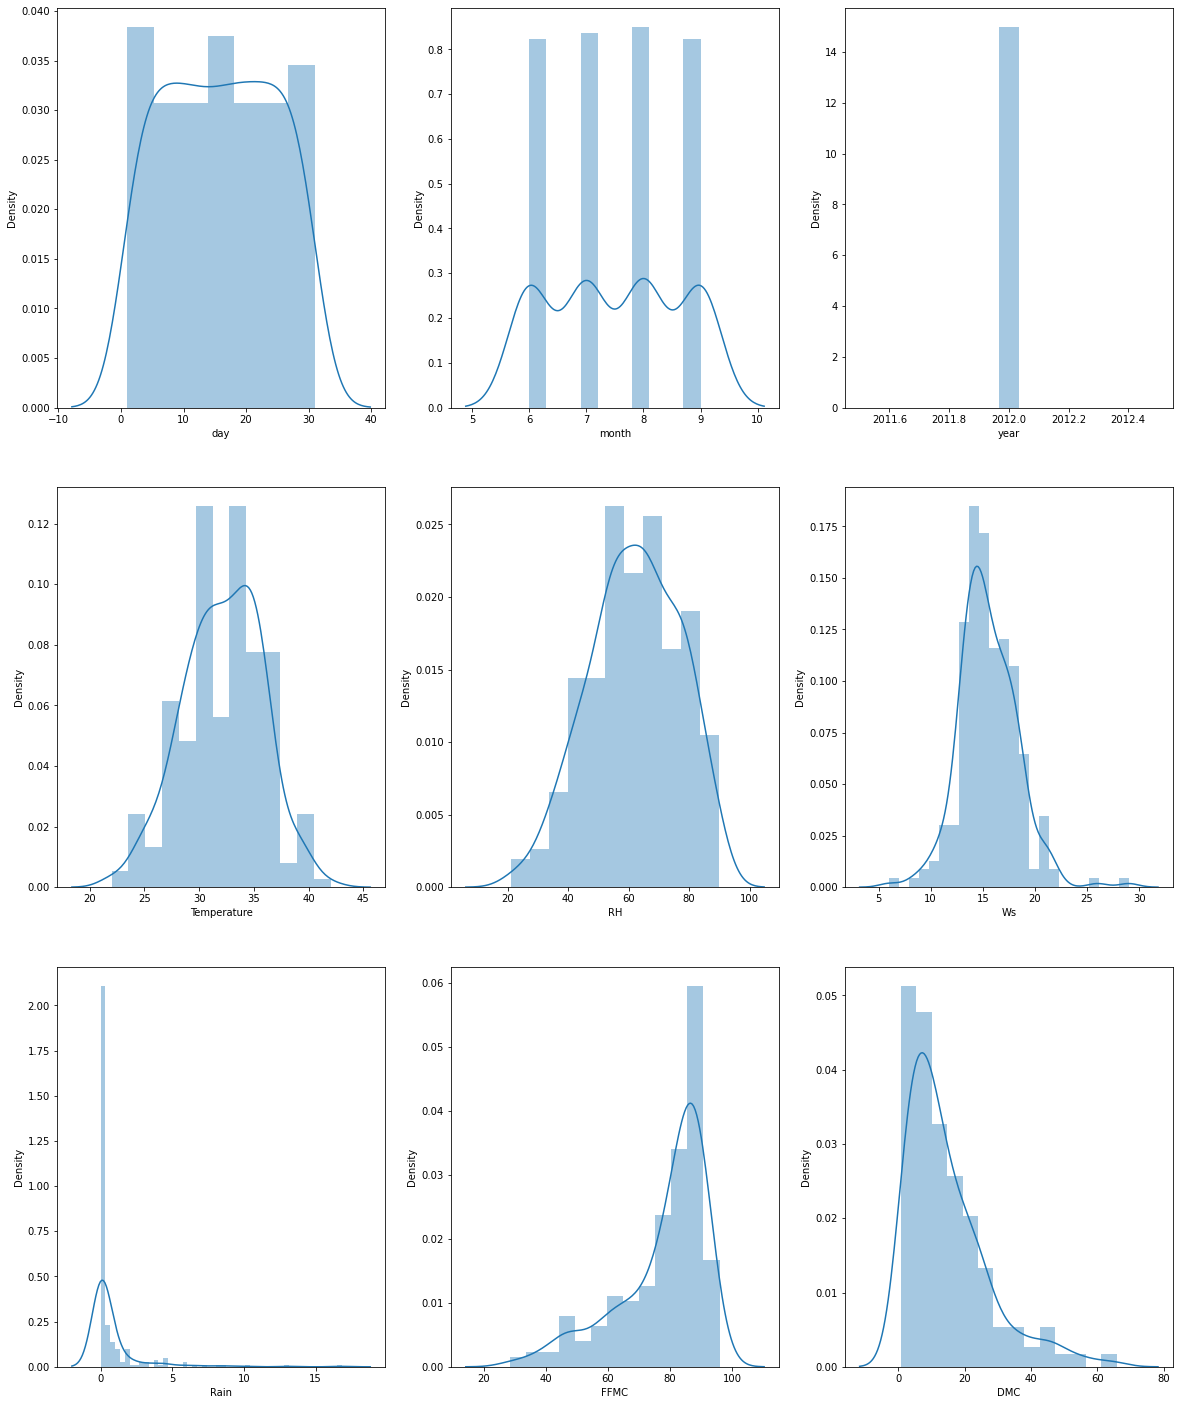

In [140]:
## Visualizing the distribution of all columns together using for loop of columns through distribution plot 

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for i in dataset:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(dataset[i])
        plt.xlabel(i)
    plotnumber = plotnumber+1
plt.show()

<AxesSubplot:>

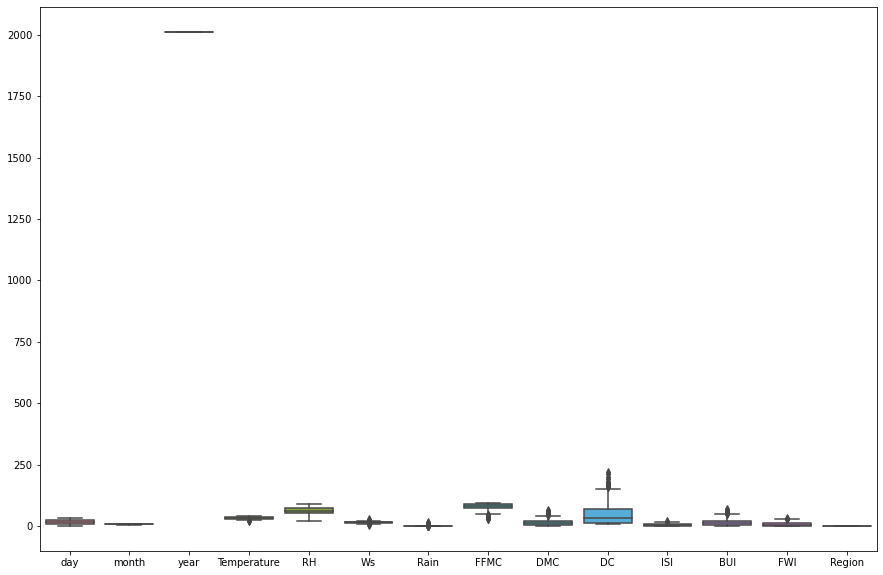

In [141]:
## Finding outliers using Box plot (subplot to display all columns together in single plot)

fig,ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=dataset,ax=ax)

In [142]:
dataset.describe().T

## By looking into Boxplot and Describe function, following columns have outliers

# Ws , Rain , FFMC , DMC , DC , ISI , BUI , FWI

,count,mean,std,min,25%,50%,75%,max
day,243.0,15.761317,8.842552,1.0,8.00,16.0,23.00,31.0
month,243.0,7.502058,1.114793,6.0,7.00,8.0,8.00,9.0
year,243.0,2012.000000,0.000000,2012.0,2012.00,2012.0,2012.00,2012.0
Temperature,243.0,32.152263,3.628039,22.0,30.00,32.0,35.00,42.0
RH,243.0,62.041152,14.828160,21.0,52.50,63.0,73.50,90.0
Ws,243.0,15.493827,2.811385,6.0,14.00,15.0,17.00,29.0
Rain,243.0,0.762963,2.003207,0.0,0.00,0.0,0.50,16.8
FFMC,243.0,77.842387,14.349641,28.6,71.85,83.3,88.30,96.0
DMC,243.0,14.680658,12.393040,0.7,5.80,11.3,20.80,65.9
DC,243.0,49.430864,47.665606,6.9,12.35,33.1,69.10,220.4


In [143]:
## Removing outliers from necessary columns together using IQR method

cols = ['Ws' , 'Rain' , 'FFMC' , 'DMC' , 'DC' , 'ISI' , 'BUI' , 'FWI'] # The columns which outliers to be removed

# Calculate quantiles and IQR
Q1 = dataset[cols].quantile(0.25) # Same as np.percentile but maps (0,1) and not (0,100)
Q3 = dataset[cols].quantile(0.75)
IQR = Q3 - Q1

# Return a boolean array of the rows with (any) non-outlier column values
condition = ~((dataset[cols] < (Q1 - 1.5 * IQR)) | (dataset[cols] > (Q3 + 1.5 * IQR))).any(axis=1)

# Filter our dataframe based on condition
filtered_dataset = dataset[condition]

<AxesSubplot:>

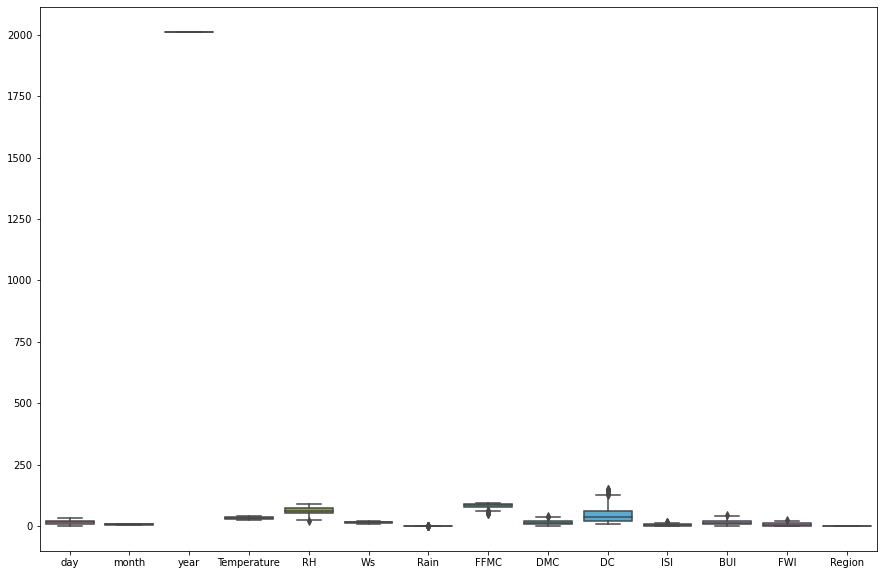

In [144]:
## Finding outliers using Box plot (subplot to display all columns together in single plot)

fig,ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=filtered_dataset,ax=ax)

# Now we can see outliers from those columns are mostly removed

C:\Users\bharg\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\bharg\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\bharg\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

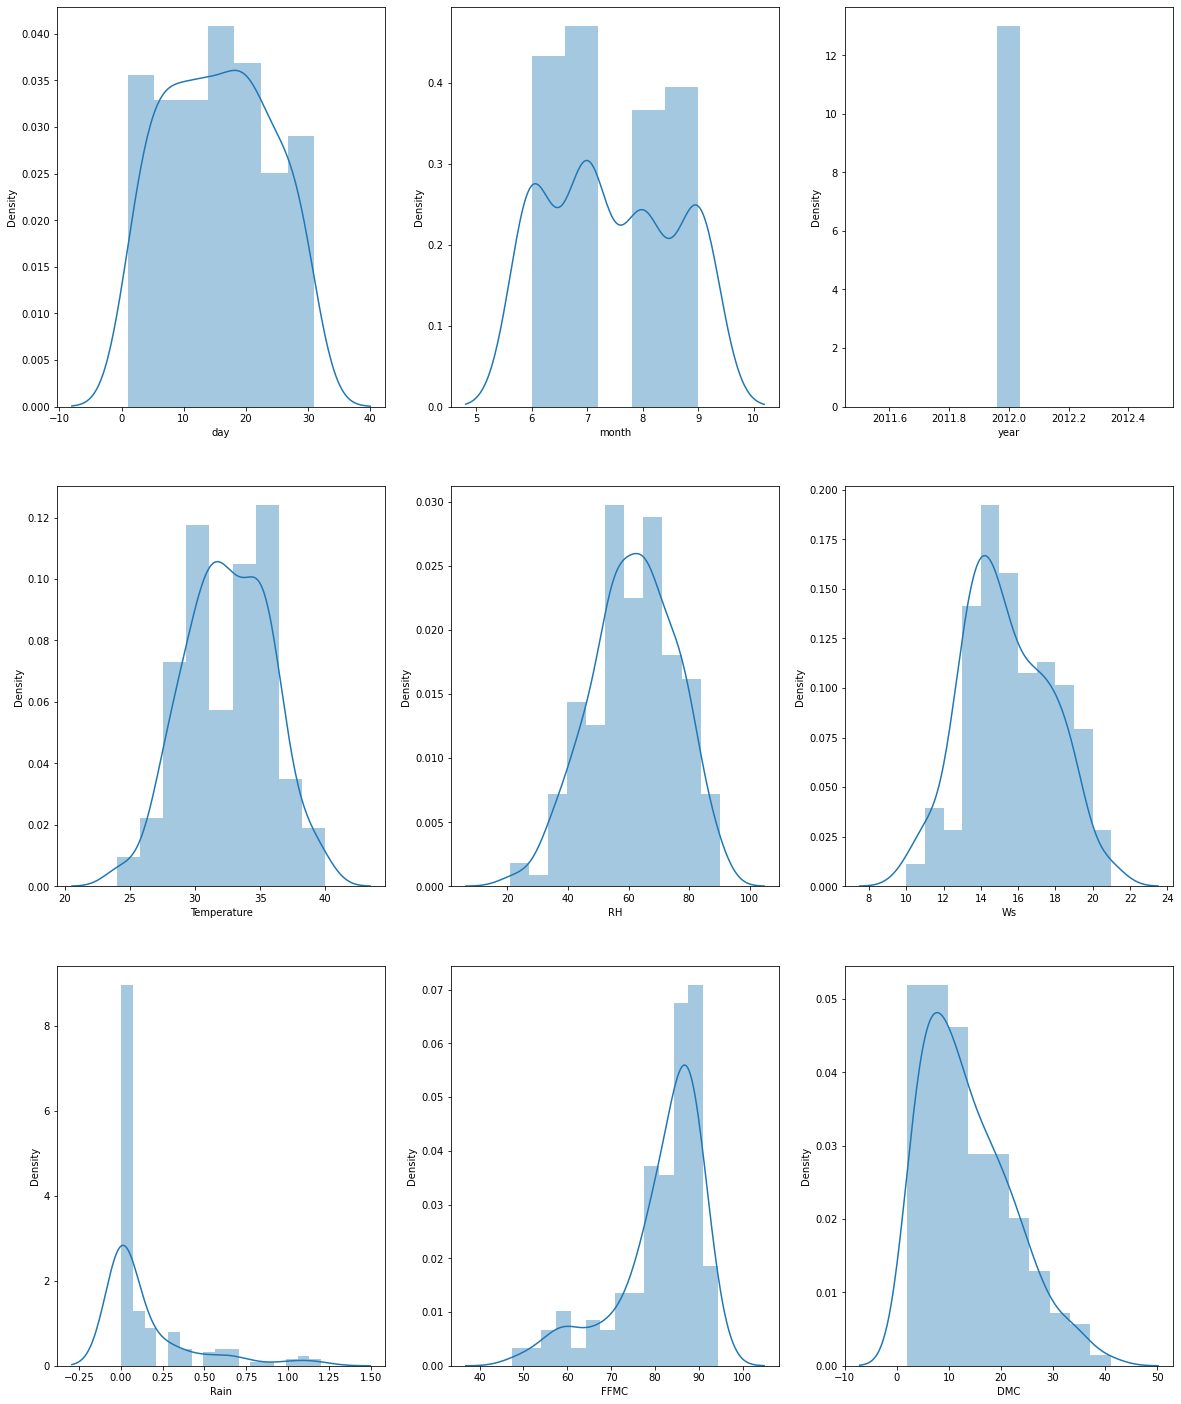

In [145]:
## Visualizing the distribution of all columns again to ensure outliers are removed and we get Normal distribution

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for i in dataset:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(filtered_dataset[i])
        plt.xlabel(i)
    plotnumber = plotnumber+1
plt.show()

In [172]:
## Checking whether the dataset is balance or imbalanced based on the target column

filtered_dataset.groupby(['Classes'])['Classes'].count()

## As we have almost equal ncount of values on both categories, it is balanced dataset, hence Performance metrics of Accuracy would be suffice.

Classes
fire              1
fire            112
not fire         63
not fire          1
Name: Classes, dtype: int64

<AxesSubplot:>

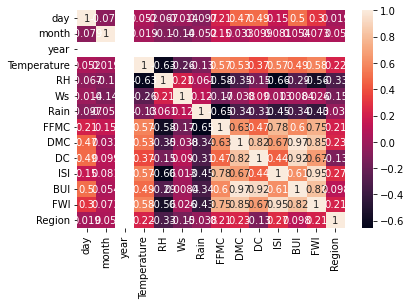

In [146]:
## Finding the correlation between the features

sns.heatmap(filtered_dataset.corr(),annot = True)

In [147]:
filtered_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 177 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          177 non-null    int32  
 1   month        177 non-null    int32  
 2   year         177 non-null    int32  
 3   Temperature  177 non-null    int32  
 4   RH           177 non-null    int32  
 5   Ws           177 non-null    int32  
 6   Rain         177 non-null    float64
 7   FFMC         177 non-null    float64
 8   DMC          177 non-null    float64
 9   DC           177 non-null    float64
 10  ISI          177 non-null    float64
 11  BUI          177 non-null    float64
 12  FWI          177 non-null    float64
 13  Classes      177 non-null    object 
 14  Region       177 non-null    int32  
dtypes: float64(7), int32(7), object(1)
memory usage: 17.3+ KB


In [149]:
## Defining Independent and Dependent Features using drop colum method

X = filtered_dataset.drop(columns = ['Classes'])
y = filtered_dataset['Classes']

In [150]:
X

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1
5,6,6,2012,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,1
6,7,6,2012,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,1
7,8,6,2012,30,73,15,0.0,86.6,12.1,38.3,5.6,13.5,7.1,1
8,9,6,2012,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,1
9,10,6,2012,28,79,12,0.0,73.2,9.5,46.3,1.3,12.6,0.9,1
10,11,6,2012,31,65,14,0.0,84.5,12.5,54.3,4.0,15.8,5.6,1
11,12,6,2012,26,81,19,0.0,84.0,13.8,61.4,4.8,17.7,7.1,1
12,13,6,2012,27,84,21,1.2,50.0,6.7,17.0,0.5,6.7,0.2,1


In [151]:
y

0       not fire   
4       not fire   
5           fire   
6           fire   
7           fire   
8       not fire   
9       not fire   
10          fire   
11          fire   
12      not fire   
13      not fire   
17      not fire   
18      not fire   
19      not fire   
20          fire   
21      not fire   
22          fire   
23          fire   
24          fire   
25          fire   
26          fire   
27          fire   
28      not fire   
29          fire   
30      not fire   
31      not fire   
32      not fire   
33      not fire   
34          fire   
35          fire   
36      not fire   
37          fire   
39      not fire   
40      not fire   
41      not fire   
42      not fire   
43      not fire   
44      not fire   
45      not fire   
46          fire   
47          fire   
48          fire   
49          fire   
50          fire   
51      not fire   
53      not fire   
54          fire   
55          fire   
56          fire   
57          fire   


In [152]:
## Splitting the dataset into train and test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Feature Engineering

In [156]:
## Scaling the dataset

## Standardize the dataset (Feature scaling)

from sklearn.preprocessing import StandardScaler

# Standard Scaler - it centralize the data where Mean=0 and Std Dev = 1 from where distribution happens

## create object
scaler = StandardScaler()
scaler

StandardScaler()

In [157]:
X_train = scaler.fit_transform(X_train)
X_train

# Only Independent fetautes to be scaled
# Independent features from trained dataset to be scaled and transformed as per z score formula
# Independent features from test dataset to be only transformed

array([[ 1.59596439, -1.28731553,  0.        , ...,  0.8043036 ,
        -0.5081859 , -0.93435318],
       [-0.18515602,  0.47900113,  0.        , ...,  0.65616444,
         1.45627286,  1.0702591 ],
       [-1.1350869 , -1.28731553,  0.        , ..., -0.62770833,
        -0.64136954,  1.0702591 ],
       ...,
       [ 0.6460335 , -1.28731553,  0.        , ..., -0.71659183,
        -0.79120114, -0.93435318],
       [ 1.35848167,  1.36215945,  0.        , ..., -0.65733616,
        -0.47488999, -0.93435318],
       [-0.42263874, -1.28731553,  0.        , ...,  0.54752905,
         0.99013011,  1.0702591 ]])

In [158]:
X_test = scaler.transform(X_test)
X_test

array([[ 1.23974031e+00, -1.28731553e+00,  0.00000000e+00,
        -4.00042094e-01,  1.30787953e-01,  1.18641049e+00,
        -5.20894395e-01,  5.46716561e-01,  4.92708514e-01,
         7.05189648e-01,  4.91634392e-01,  5.87032828e-01,
         6.07227126e-01, -9.34353184e-01],
       [ 1.00225759e+00, -4.04157201e-01,  0.00000000e+00,
        -1.29070185e+00,  1.13572608e+00,  3.58029202e-01,
        -1.43805201e-01, -1.05916714e+00, -4.72166528e-01,
         9.27931419e-01, -1.00310624e+00, -9.44073325e-02,
        -9.41032745e-01, -9.34353184e-01],
       [-1.37256963e+00,  4.79001127e-01,  0.00000000e+00,
         1.67816400e+00, -1.95086960e+00, -5.61614435e-02,
        -5.20894395e-01,  1.21583477e+00,  1.10458049e+00,
        -1.15289535e-01,  3.02987321e+00,  7.15420105e-01,
         2.32196655e+00,  1.07025910e+00],
       [-1.01634554e+00, -4.04157201e-01,  0.00000000e+00,
         7.87504247e-01,  1.30787953e-01,  1.18641049e+00,
         2.33283993e-01, -1.03283985e-01, -4.

## Model training

In [159]:
## create object

logistic_reg = LogisticRegression()
logistic_reg

LogisticRegression()

In [160]:
## Train the training data with logistic regression

logistic_reg.fit(X_train,y_train)

LogisticRegression()

In [161]:
## Prediction for the test data

y_pred = logistic_reg.predict(X_test)
y_pred

array(['fire   ', 'not fire   ', 'fire   ', 'not fire   ', 'fire   ',
       'not fire   ', 'fire   ', 'not fire   ', 'not fire   ', 'fire   ',
       'not fire   ', 'not fire   ', 'fire   ', 'fire   ', 'not fire   ',
       'fire   ', 'fire   ', 'not fire   ', 'not fire   ', 'fire   ',
       'fire   ', 'fire   ', 'not fire   ', 'fire   ', 'fire   ',
       'fire   ', 'fire   ', 'fire   ', 'not fire   ', 'not fire   ',
       'fire   ', 'fire   ', 'fire   ', 'fire   ', 'not fire   ',
       'not fire   ', 'not fire   ', 'fire   ', 'fire   ', 'fire   ',
       'not fire   ', 'not fire   ', 'fire   ', 'not fire   ', 'fire   ',
       'fire   ', 'fire   ', 'fire   ', 'not fire   ', 'fire   ',
       'not fire   ', 'fire   ', 'not fire   ', 'fire   ', 'fire   ',
       'not fire   ', 'not fire   ', 'not fire   ', 'not fire   '],
      dtype=object)

## Performance Metrics

In [162]:
## Calculating Accuracy

accuracy = accuracy_score(y_test,y_pred)
accuracy

0.9152542372881356

In [163]:
## Calculating Confusion Matrix

conf_matrix = confusion_matrix(y_test,y_pred)
conf_matrix

array([[33,  5],
       [ 0, 21]], dtype=int64)

In [164]:
true_positive = conf_matrix[0][0]
false_positive = conf_matrix[0][1]
false_negative = conf_matrix[1][0]
true_negative = conf_matrix[1][1]

In [165]:
# Calculating Accuracy using math formula

Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.9152542372881356

In [166]:
# # Calculating Precision using math formula

Precision = true_positive/(true_positive+false_positive)
Precision

0.868421052631579

In [167]:
# Calculating Recall using math formula

Recall = true_positive/(true_positive+false_negative)
Recall

1.0

In [168]:
# # Calculating F1_Score using math formula

F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.9295774647887324

## Observation

### From the Accuracy , the Model performance is 91% accurate

In [171]:
# filtered_dataset.groupby(['Classes','Region'])['Classes'].count()

Classes       Region
fire          1          1
fire          1         51
              2         61
not fire      1         42
              2         21
not fire      2          1
Name: Classes, dtype: int64